# 2D Linear Inversion of Crosswell Tomography Data

In [1]:
import numpy as np
from geoscilabs.inversion.TomographyInversion import TomographyInversionApp
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib inline
app = TomographyInversionApp()

# Purpose

From the Linear inversion notebook (1D), we learned important apsects about the linear inversion. 
However, real world geophysical inverse problem are not often 1D, but multidimensional (2D or 3D), and this extension of dimension allows us to put more apriori (or geologic) information through the regularization term. 
In this notebook, we explore these multidimensional aspects of the linear inversion by using 2D traveltime croswell tomography example. 

## Outline
This notebook includes four steps:
- Step1: Generate a velocity model
- Step2: Simulate traveltime data and add noise
- Step3: Run Smooth inversion
- Step4: Run LpLq inversion

## Step1: Generate a velocity model

- `v0`: velocity of the background
- `v1`: velocity of the block
- `xc`: x center of the block
- `yc`: y center of the block
- `dx`: width of the block
- `dy`: thickness of the block
- `add block`: use active when you want to add block (if not stay inactive)
- `model type`: background or block

In [2]:
app.interact_plot_model()

## Step2: Simulate travel time data and add noise

In [3]:
app.interact_data()

## Step3: Smooth inversion

- `maxIter`: maximum number of iteration
- `m0`: initial model
- `mref`: reference model
- `percentage`: percent standard deviation for the uncertainty
- `floor`: floor value for the uncertainty
- `chifact`: chifactor for the target misfit
- `beta0_ratio`: ratio to set the initial beta
- `coolingFactor`: cooling factor to cool beta
- `coolingRate`: cooling rate to cool beta
- `alpha_s`: $\alpha_s$
- `alpha_x`: $\alpha_x$
- `alpha_z`: $\alpha_z$
- `use_target`: use target misfit as a stopping criteria or not

### Step 3-1: Run inversion

In [4]:
model, pred, save = app.run_inversion(
    maxIter=20,
    m0=1./1000.,
    mref=1./1000.,
    percentage=0,
    floor=0.01,
    chifact=1,
    beta0_ratio=1e2,
    coolingFactor=2,
    coolingRate=1,
    alpha_s=1e-2,
    alpha_x=1e0,
    alpha_z=1e0,
    use_target=True
)

SimPEG.DataMisfit.l2_DataMisfit assigning default std of 5%
SimPEG.DataMisfit.l2_DataMisfit assigning default eps of 1e-5 * ||dobs||

    SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
    ***Done using same Solver and solverOpts as the problem***
SimPEG.SaveOutputEveryIteration will save your inversion progress as: '###-InversionModel-2019-03-11-15-52.txt'
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  7.27e+07  1.05e+02  0.00e+00  1.05e+02    1.42e+05      0              
   1  3.63e+07  8.57e+01  8.51e-08  8.88e+01    5.13e+04      0              
   2  1.82e+07  8.19e+01  1.61e-07  8.48e+01    4.65e+04      0   Skip BFGS  
   3  9.09e+06  7.86e+01  2.90e-07  8.12e+01    4.35e+04      0   Skip BFGS  
   4  4.54e+06  7.49e+01  5.84e

### Step 3-2: Plot recovered model

In [5]:
app.interact_model_inversion(model)

interactive(children=(IntSlider(value=9, description='ii', max=9), Checkbox(value=False, description='fixed'),…

### Step 3-3: Plot predicted data 

In [6]:
app.interact_data_inversion(pred)

interactive(children=(IntSlider(value=9, continuous_update=False, description='ii', max=9), Checkbox(value=Fal…

### Step 3-4: Plot misfit curves

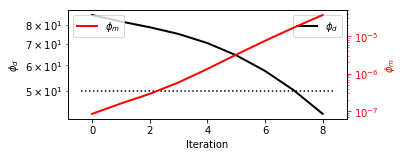

In [7]:
save.plot_misfit_curves()

## Step4: Lp-Lq inversion

- `maxIter`: maximum number of iteration
- `m0`: initial model
- `mref`: reference model
- `percentage`: percent standard deviation for the uncertainty
- `floor`: floor value for the uncertainty
- `chifact`: chifactor for the target misfit
- `coolingFactor`: cooling factor to cool beta
- `coolingRate`: cooling rate to cool beta
- `alpha_s`: $\alpha_s$
- `alpha_x`: $\alpha_x$
- `alpha_z`: $\alpha_z$
- `use_lqlq`: use lplq inversion or not
- `p`: norm for the smallness
- `qx`: norm for the smoothness in x-direction
- `qz`: norm for the smoothness in z-direction
- `beta_start`: starting beta

### Step 4-1: Run inversion

In [8]:
model_lplq, pred_lplq, save_lplq = app.run_inversion(
    maxIter=30,
    m0=model[-1],
    mref=1./1000.,
    percentage=0.,
    floor=0.01,
    chifact=1,
    coolingFactor=2,
    coolingRate=1,
    alpha_s=1e0,
    alpha_x=1e0,
    alpha_z=1e0,
    use_lplq=True,
    p=0,
    qx=2,
    qz=2,
    beta_start=1.4e5
)

SimPEG.DataMisfit.l2_DataMisfit assigning default std of 5%
SimPEG.DataMisfit.l2_DataMisfit assigning default eps of 1e-5 * ||dobs||

    SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
    ***Done using same Solver and solverOpts as the problem***
SimPEG.SaveOutputEveryIteration will save your inversion progress as: '###-InversionModel-2019-03-11-15-52.txt'
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.40e+05  4.25e+01  1.12e-04  5.81e+01    2.24e+04      0              


/Users/sgkang/Projects/simpeg/SimPEG/Directives.py:935: UserWarning: Without a Linear preconditioner, convergence may be slow. Consider adding `Directives.UpdatePreconditioner` to your directives list
  "Without a Linear preconditioner, convergence may be slow. "


Reached starting chifact with l2-norm regularization: Start IRLS steps...
eps_p: 0.0001776081487382178 eps_q: 0.0001776081487382178
delta phim: 0.000e+00
   1  7.00e+04  4.12e+01  1.51e-04  5.18e+01    1.78e+04      0              
delta phim: 1.907e+07
   2  7.00e+04  3.42e+01  2.66e-04  5.28e+01    1.33e+04      0              
delta phim: 5.404e-01
   3  7.00e+04  3.65e+01  2.40e-04  5.34e+01    9.86e+03      0              
delta phim: 5.283e-02
   4  7.00e+04  3.82e+01  2.22e-04  5.38e+01    9.17e+03      0   Skip BFGS  
delta phim: 1.070e-01
   5  7.00e+04  3.96e+01  2.05e-04  5.39e+01    9.57e+03      0   Skip BFGS  
delta phim: 1.117e-01
   6  7.00e+04  4.07e+01  1.88e-04  5.39e+01    1.05e+04      0   Skip BFGS  
delta phim: 1.072e-01
   7  7.00e+04  4.17e+01  1.73e-04  5.38e+01    1.16e+04      0              
delta phim: 1.004e-01
   8  7.00e+04  4.18e+01  1.68e-04  5.36e+01    1.54e+04      0              
delta phim: 1.719e-01
   9  7.00e+04  4.29e+01  1.51e-04  5.35e+01  

### Step 4-2: Plot recovered model

In [10]:
app.interact_model_inversion(model_lplq)

interactive(children=(IntSlider(value=30, description='ii', max=30), Checkbox(value=False, description='fixed'…

### Step 4-3: Plot predicted data

In [11]:
app.interact_data_inversion(pred_lplq)

interactive(children=(IntSlider(value=30, continuous_update=False, description='ii', max=30), Checkbox(value=F…

### Step 4-4: Plot misfit curves

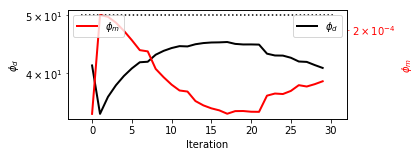

In [12]:
save_lplq.plot_misfit_curves()

In [13]:
# save_lplq.plot_tikhonov_curves()